2. Para determinar el grado del polinomio que interpola una data ajustando por mínimos cuadrados,
se recurre a la ecuación:

<h3 align="center">$\sigma = \frac{\sum\limits_{i=1}^{N}e^2_i}{N-n-1}$</h3>

Donde: 
* $\sigma$ es la varianza
* n es el grado del polinomio 
* N el número de datos que se ajustan
* $e_i^2 = (y_i − \hat{y}_i)^2$ son las desviaciones de los puntos. 

Se empieza con un polinomio de grado uno, se calcula su varianza y se reserva, luego se repite el procedimiento para un polinomio de grado 2 y así sucesivamente mientras haya un decremento de la varianza. 

Se elige el polinomio de varianza mínima y de menor grado. 

**Aplicando este criterio :**

**a)** ¿ cuál es el polinomio de menor grado que mejor ajusta la data dada a continuación ?

In [1]:
x = [ 0.05, 0.11, 0.15, 0.31, 0.46, 0.52, 0.70, 0.74, 0.82, 0.98, 1.17]
y = [0.956, 0.890, 0.832, 0.717, 0.571, 0.539, 0.378, 0.370, 0.306, 0.242, 0.104]

**Respuesta:**

1- Insertamos el código que permite el calculo de poliniomios por minimos cuadrados

In [19]:
import numpy as np
from sympy import *

In [24]:
def min_cuadrados(x,y,m):
    #*---Entradas---*#   
    if(len(x) != len(y)):
        return print("Error al ingresar datos!")    

    if(m >= len(x)):
        return print("Se requieren más datos para este grado")
    
    x = np.array(x)
    y = np.array(y)

    m += 1
    n = len(x)
    Sx = np.zeros((n,n),float)
    Sxy = np.zeros(n,float)
    auxSx = np.empty((m,m),float)
    auxSxy = np.empty((m),float)
    auxSol = np.empty((m),float)

    Px = 0
    X = symbols('x')
    Y = symbols('y', cls=Function)
    
    #*--- Procesos ---*#
    # *--- Creando vectores ---*#
    for i in range(n):
        for j in range(n):
            for k in range(n):
                #*--- Matriz de sumatorias de x elevado ---*#
                Sx[i,j] += x[k]**(j+i)
            #*--- Vector de sumatorias de y * x elevado ---#
            Sxy[i] += y[j]*(x[j]**i) 
    
    #*--- Solucionando el sistema ---*#
    auxSx = Sx[0:m,0:m]
    auxSxy = Sxy[0:m]
    sol = np.linalg.solve(auxSx,auxSxy)
    auxSol = np.around(sol,3)
    #*--- Armando el polinomio solicitado ---*#
    for i in range(m):
        Px += X**i * np.around(sol[i],3)
    
    Y = Px
    #*--- Salidas ---*#    
    return Y

2- Insertamos el algoritmo para resolver el ejercicio planteado

In [28]:
def sigmaFunction():    
    sigma = Symbol('sigma')
    N = len(x)
    n = 2
    acum = 0
    grade = []
    y_b = []

    less_num = 0

    for i in range(N):
        function_c = (min_cuadrados(x,y,N-1))

        for j in range(N):
            acum += ((y[j]- function_c.subs('x',x[j]))**2)/(N-n-1)
        grade.append(acum)

    less_num = grade[0]
    for i in range(N):
        if(less_num > grade[i]):
            less_num = grade[i]

    grade_pol = grade.index(less_num)+1

    interpol = min_cuadrados(x,y,grade_pol)

    for i in range(N):
        y_b.append(interpol.subs('x',x[i]))

    print("El polinio que mejor interpola es de grado ", grade_pol)
    print("La varianza expresada es de ", sigma, '=', less_num)
    print("Y tiene la forma de: ", interpol)
    
sigmaFunction()

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 6.77877530479635e-6
Y tiene la forma de:  0.952 - 0.76*x


**b)** En una sola gráfica representar los puntos de la data y el polinomio de menor grado encontrado
en el literal anterior.

In [10]:
%matplotlib inline

In [56]:
from matplotlib import pyplot as plt

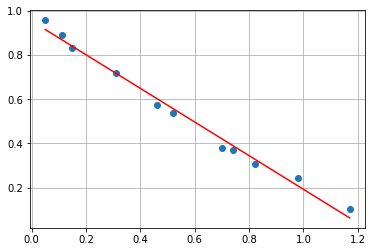

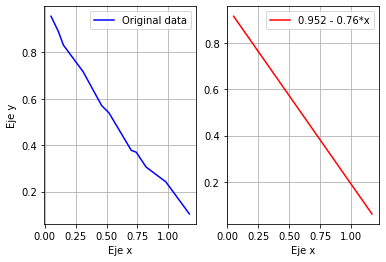

In [82]:
fig, axes = plt.subplots()
axes.plot(x,y,'o')
axes.plot(x,y_b,'r', label="")
axes.grid(true)

fig,axes = plt.subplots(1,2)
axes[0].plot(x,y, 'b', label="Original data")
axes[0].set_xlabel("Eje x")
axes[0].set_ylabel("Eje y")
axes[0].legend()
axes[0].grid(true)
axes[1].plot(x,y_b, 'r', label=interpol)
axes[1].legend()
axes[1].set_xlabel("Eje x")
axes[1].grid(true)